# ATMOS 2022 - DMSP Analysis

-----------

## 0. Import Libraries

In [2]:
import cartopy
import matplotlib.pyplot as plt
import proplot
from matplotlib.colors import BoundaryNorm

from utils.data import *
from utils.utils import *
from utils.visualization_codes import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Calculate Hight Light Fraction

In [3]:
# province names
provinces = ['istanbul', 'ankara']

# define land-use index correspondence of name
indexes = define_index_correspondence()
    
# years in data
years = np.arange(1992, 2014)

# define which land cover is used for the calculation
total_grid_use = np.arange(0, 64)
hight_light_grid_use = np.arange(50, 64)

Assuming that higher than 50 bit light data corresponds to urban areas

In [4]:
# calculation of relative high light intensity 
province_high_light_percent = {}
for province in provinces:
    
    # open specific province corine data
    dt = retrieve_dmsp(province)

    # find high intensity light percentages relative to total grid
    high_light_percent = {}
    for year in years:

        # find total grid amount in single year data
        total_grid_amount = find_grid_amount(dt,
                                             total_grid_use,
                                             year)

        # find urban grid amount in single year data
        high_light_grid_amount = find_grid_amount(dt,
                                             hight_light_grid_use,
                                             year)

        # calculate percent representation of urban LU relative to whole LU
        high_light_percent[year] = (high_light_grid_amount / total_grid_amount) * 100 
    
    province_high_light_percent[province] = high_light_percent

In [5]:
province_high_light_percent_df = pd.DataFrame(province_high_light_percent)

In [6]:
province_high_light_percent_df

,istanbul,ankara
1992,9.835146,1.384832
1993,10.440731,1.251385
1994,13.322866,1.495619
1995,13.984524,1.702085
1996,11.988337,1.659281
1997,13.064932,1.291671
1998,13.199507,1.576191
1999,15.711562,1.626548
2000,18.526410,2.135160
2001,17.012448,1.704603


In [7]:
# get the tranpose for easier plotting
province_high_light_percent_df_tpose = province_high_light_percent_df \
            .transpose()\
            .reset_index()\
            .rename(columns={'index': 'Province'})

In [8]:
province_high_light_percent_df_tpose

,Province,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,istanbul,9.835146,10.440731,13.322866,13.984524,11.988337,13.064932,13.199507,15.711562,18.52641,...,16.350791,14.489178,17.741393,21.677694,20.174947,20.488954,26.858809,22.911293,28.182124,27.318605
1,ankara,1.384832,1.251385,1.495619,1.702085,1.659281,1.291671,1.576191,1.626548,2.13516,...,1.900997,1.702085,2.480109,3.008863,3.031524,2.721825,3.970692,4.023567,4.786484,4.509518


### 1.1 Plot High-Light Change

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/ui.py:406: ProPlotWarning: You specified both figsize=(6, 3) and axwidth=1.5. Ignoring 'axwidth'.
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

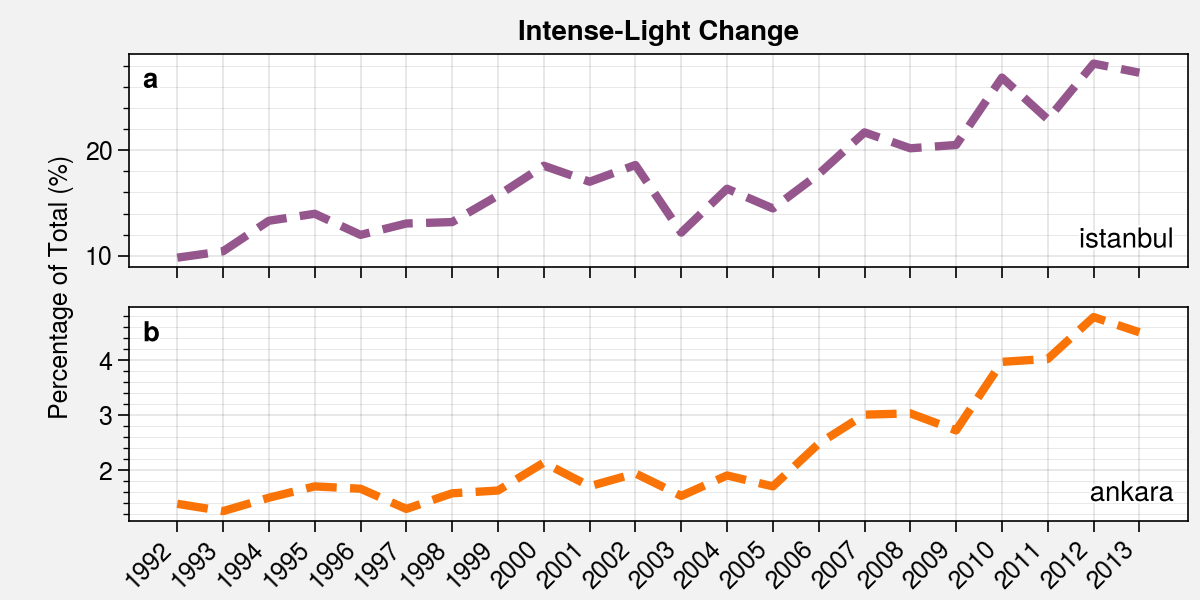

In [12]:
method = 'dmsp_lineplot'
suptitle='Intense-Light Change'
fig_array = [[1, 1],
             [2, 2],
             ]

line_plot(province_high_light_percent_df_tpose, method, fig_array, suptitle)

--------

## 2. Difference Between First and Last Light Image 

In [9]:
# calculation of relative high light intensity 
province_dif_percent = {}
for province in provinces:
    
    # open specific province corine data
    dt = retrieve_dmsp(province)
    
    # find the percent difference between the light magnitude
    # of the last and first image
    dif_percent = ((dt[-1] - dt[0]) / dt[0] * 10)
    province_dif_percent[province] = dif_percent

### 2.1 Plot of Difference

/tmp/ipykernel_392/3703125923.py:3: ProplotWarning: Found conflicting default user proplot folders at '/home/donmezk16/.proplot' and '/home/donmezk16/.config/proplot'. Ignoring the second one.
  cmap = proplot.Colormap(
/mnt/c/Users/USER/JupyterLab/Portfolio/ATMOS22-Paper-Codes/utils/visualization_codes.py:162: ProplotWarning: Ignoring unused projection-specific format() keyword argument(s): {'aspect': 4}
  fig, axs = proplot.subplots(fig_array,


Saved colormap to '/home/donmezk16/.proplot/cmaps/SciVisColorEven.json'.


/mnt/c/Users/USER/JupyterLab/Portfolio/ATMOS22-Paper-Codes/utils/visualization_codes.py:201: ProplotWarning: Ignoring unused keyword arg(s): {'vmin': -80, 'vmax': 80}
  mesh = axs[i].pcolormesh(data_df[province]['x'], data_df[province]['y'],
/mnt/c/Users/USER/JupyterLab/Portfolio/ATMOS22-Paper-Codes/utils/visualization_codes.py:201: ProplotWarning: Ignoring unused keyword arg(s): {'vmin': -80, 'vmax': 80}
  mesh = axs[i].pcolormesh(data_df[province]['x'], data_df[province]['y'],
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  return func(self, *args, **kwargs)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:469: Matp

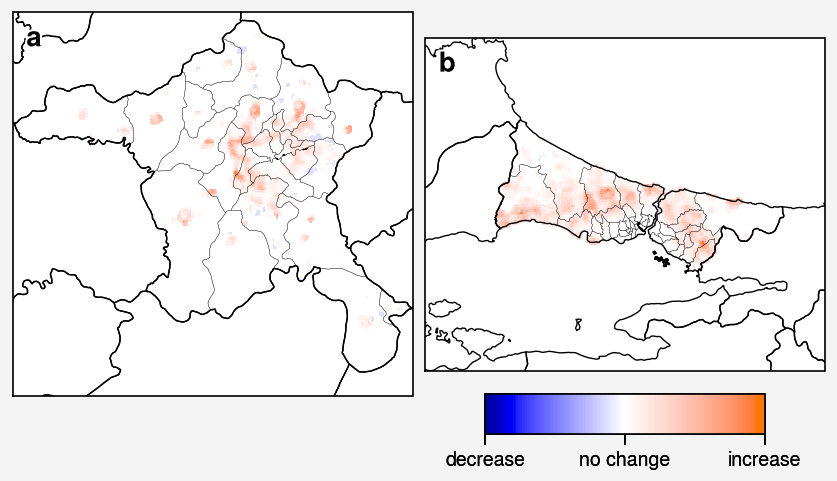

In [13]:
# Parameters to change (plot) -------------------
# colormap
cmap = proplot.Colormap(
    'darkblue_r', 'orange',
    name='SciVisColorEven', save=True
)

# graphic vmin, vmax and norms
vmin = -80 # consider lower limit above
vmax = 80 # consider upper limit above
norm_inc = 1 # norm increment
ticks_inc = 80 # ticks increment
norm = BoundaryNorm(np.arange(vmin, vmax+norm_inc, norm_inc),
                    ncolors=cmap.N, clip=True)
ticks = np.arange(vmin, vmax+ticks_inc, ticks_inc)

# -------------------------------------------------------------------

# data
data_df = province_dif_percent

# projection
proj=cartopy.crs.Mercator()

# fig features
fig_array = [[1,2]
            ]
graphic_no = 2

# title and methods
suptitle = '2013-1992 Light Change'
method='dmsp_lightchange'

# make a graphic
dmsp_difference_last_first_plot(data_df, 
                                method, 
                                fig_array,
                                graphic_no,
                                proj,
                                suptitle,
                                cmap, 
                                vmin,
                                vmax,
                                norm,
                                ticks)